In [7]:
#!pip install pycaret

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 1.2MB 35.0MB/s 
     |████████████████████████████████| 133kB 28.4MB/s 
     |████████████████████████████████| 389kB 44.0MB/s 
     |████████████████████████████████| 63.9MB 62kB/s 
     |████████████████████████████████| 7.0MB 37.5MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 3.0MB 33.1MB/s 
     |████████████████████████████████| 1.6MB 23.9MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 266kB 43.7MB/s 
     |████████████████████████████████| 614kB 42.1MB/s 
     |████████████████████████████████| 2.1MB 35.5MB/s 
     |████████████████████████████████| 235kB 44.5MB/s 
     |████████████████████████████████| 6.1MB 33.6MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 552kB 43.4MB/s 


In [8]:
from pycaret.datasets import get_data
diabetes= get_data("diabetes")

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class variable                                                                int64
dtype: object

In [10]:
import seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


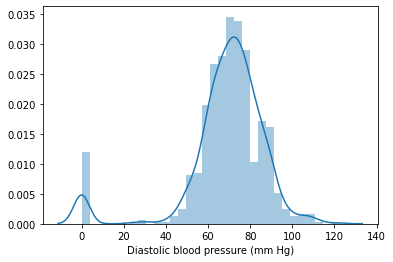

In [11]:
seaborn.distplot(diabetes["Diastolic blood pressure (mm Hg)"])

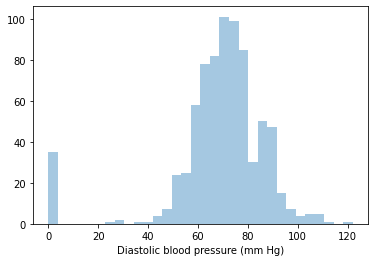

In [12]:
seaborn.distplot(diabetes["Diastolic blood pressure (mm Hg)"],kde=False)

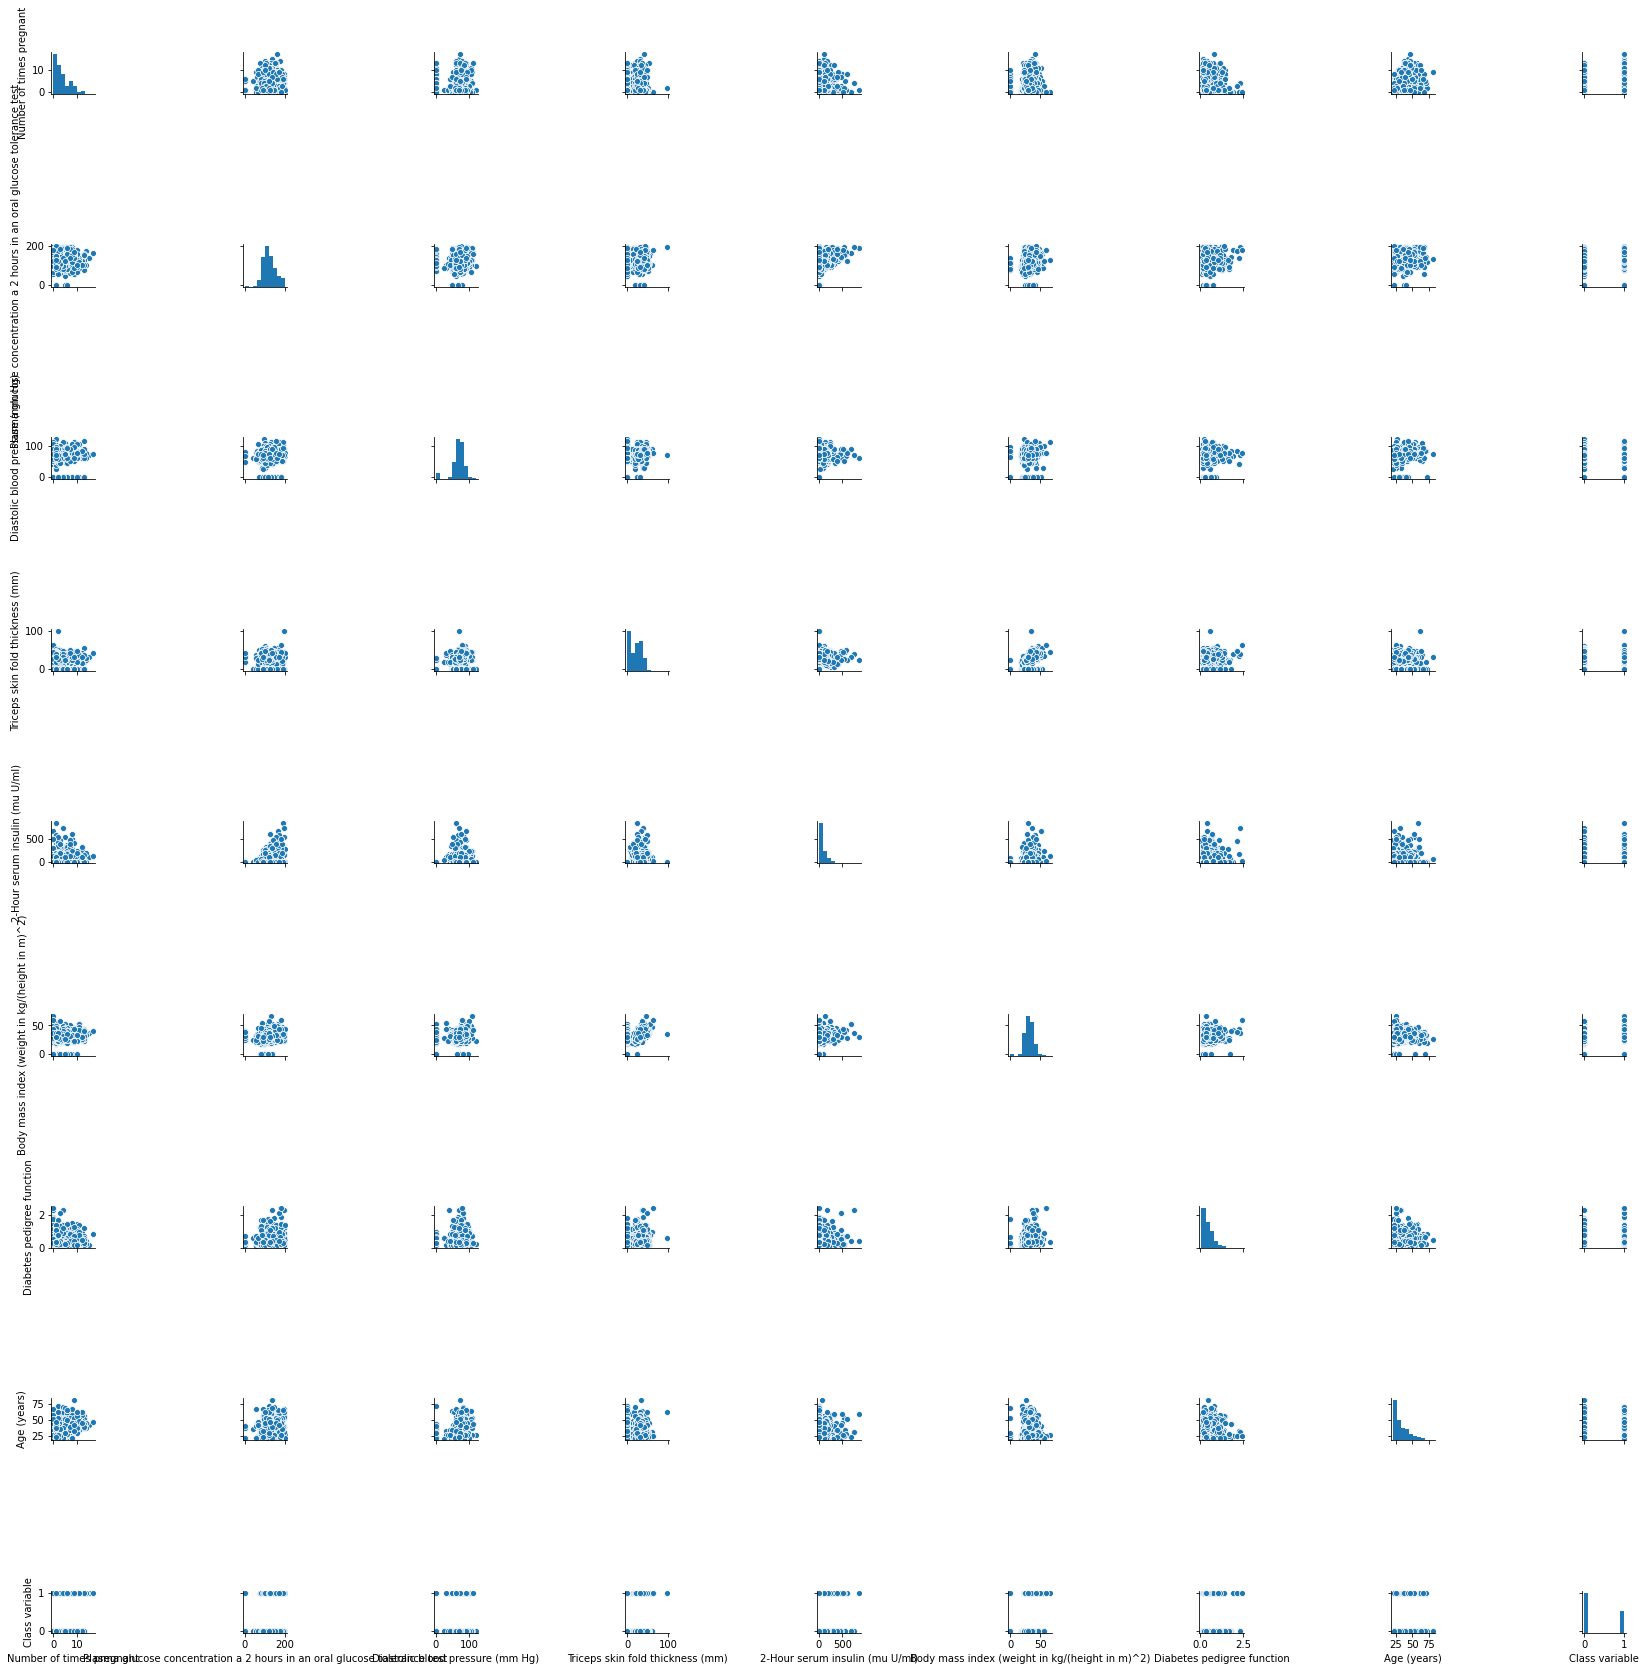

In [13]:
seaborn.pairplot(diabetes)

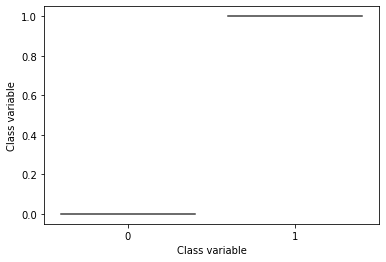

In [14]:
seaborn.violinplot(diabetes["Class variable"],diabetes["Class variable"])


In [15]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')
# comparing all models
#compare_models()

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7190
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [16]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.765200,0.824400,0.614000,0.687000,0.643700,0.470000
1,Gradient Boosting Classifier,0.763500,0.835200,0.588300,0.696700,0.631000,0.459700
2,Logistic Regression,0.763400,0.818500,0.571300,0.706500,0.622900,0.455000
3,CatBoost Classifier,0.761700,0.832600,0.610200,0.681500,0.638100,0.462400
4,Extreme Gradient Boosting,0.761600,0.833600,0.593000,0.686900,0.630500,0.456800
5,Ridge Classifier,0.757700,0.000000,0.539200,0.709900,0.603200,0.435100
6,Linear Discriminant Analysis,0.755800,0.824100,0.544400,0.705400,0.605200,0.433700
7,Random Forest Classifier,0.750300,0.800900,0.523400,0.705900,0.595000,0.419800
8,Ada Boost Classifier,0.743100,0.801500,0.583600,0.651100,0.609900,0.420400
9,K Neighbors Classifier,0.741100,0.774500,0.561400,0.662600,0.600400,0.412000


In [17]:
# creating logistic regression model
ridge_classifier = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7407,0.0,0.5263,0.6667,0.5882,0.4028
1,0.6667,0.0,0.4211,0.5333,0.4706,0.2322
2,0.8519,0.0,0.7368,0.8235,0.7778,0.6672
3,0.8704,0.0,0.6316,1.0000,0.7742,0.6897
4,0.7407,0.0,0.3158,0.8571,0.4615,0.3357
5,0.8333,0.0,0.7368,0.7778,0.7568,0.6301
6,0.7222,0.0,0.5789,0.6111,0.5946,0.3836
7,0.7170,0.0,0.5000,0.6000,0.5455,0.3424
8,0.6981,0.0,0.5000,0.5625,0.5294,0.3083
9,0.7358,0.0,0.4444,0.6667,0.5333,0.3592


In [18]:
ridge_classifier

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=7190,
                solver='auto', tol=0.001)

In [19]:
ridge_classifier_tuned=tune_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7407,0.0,0.5263,0.6667,0.5882,0.4028
1,0.6667,0.0,0.4211,0.5333,0.4706,0.2322
2,0.8704,0.0,0.7368,0.8750,0.8000,0.7051
3,0.8704,0.0,0.6316,1.0000,0.7742,0.6897
4,0.7407,0.0,0.3158,0.8571,0.4615,0.3357
5,0.8148,0.0,0.6842,0.7647,0.7222,0.5840
6,0.7407,0.0,0.6316,0.6316,0.6316,0.4316
7,0.7170,0.0,0.4444,0.6154,0.5161,0.3234
8,0.6981,0.0,0.5000,0.5625,0.5294,0.3083
9,0.7358,0.0,0.5000,0.6429,0.5625,0.3775


In [20]:
ridge_classifier_tuned

RidgeClassifier(alpha=0.092, class_weight=None, copy_X=True,
                fit_intercept=False, max_iter=None, normalize=True,
                random_state=7190, solver='auto', tol=0.001)

In [24]:
#ridge_classifier_tuned.predict()
# creating decision tree model
dt = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6481,0.6323,0.5789,0.5000,0.5366,0.2554
1,0.7037,0.6752,0.5789,0.5789,0.5789,0.3504
2,0.7778,0.7323,0.5789,0.7333,0.6471,0.4882
3,0.7222,0.6895,0.5789,0.6111,0.5946,0.3836
4,0.7778,0.7444,0.6316,0.7059,0.6667,0.5008
5,0.7593,0.7541,0.7368,0.6364,0.6829,0.4906
6,0.6296,0.5940,0.4737,0.4737,0.4737,0.1880
7,0.6792,0.6627,0.6111,0.5238,0.5641,0.3127
8,0.7925,0.7754,0.7222,0.6842,0.7027,0.5435
9,0.6604,0.6214,0.5000,0.5000,0.5000,0.2429


In [25]:
# ensembling decision tree model (bagging)
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7407,0.7632,0.4737,0.6923,0.5625,0.3874
1,0.7037,0.7857,0.4737,0.6000,0.5294,0.3175
2,0.7593,0.8286,0.5263,0.7143,0.6061,0.4384
3,0.8519,0.8992,0.6316,0.9231,0.7500,0.6499
4,0.7222,0.8180,0.4211,0.6667,0.5161,0.3350
5,0.7963,0.8865,0.7368,0.7000,0.7179,0.5587
6,0.7407,0.7594,0.5263,0.6667,0.5882,0.4028
7,0.7547,0.7183,0.6111,0.6471,0.6286,0.4457
8,0.7170,0.8190,0.5556,0.5882,0.5714,0.3604
9,0.7925,0.8175,0.6667,0.7059,0.6857,0.5310


In [27]:
dt_bagged

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=7190,


In [0]:
# Regression example

In [0]:
from pycaret.datasets import get_data

In [29]:
boston=get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
import seaborn as sn

In [31]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [0]:
from pycaret.regression import *

In [35]:
reg1=setup(boston,target="medv")

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8273
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(506, 14)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


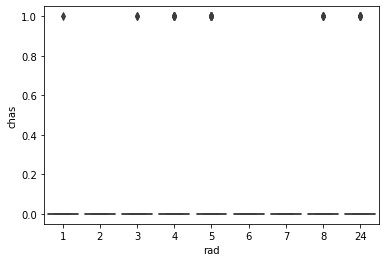

In [37]:
sn.boxplot(boston["rad"],boston["chas"])

In [40]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.134800,10.515800,3.097700,0.877200,0.140500,0.106400
1,Extra Trees Regressor,2.199700,11.222300,3.213800,0.868700,0.144000,0.111300
2,Extreme Gradient Boosting,2.338900,12.802200,3.423000,0.848800,0.154100,0.118800
3,Gradient Boosting Regressor,2.343400,12.786900,3.423500,0.847200,0.150600,0.117600
4,Light Gradient Boosting Machine,2.392900,13.423300,3.494200,0.842500,0.156800,0.120600
5,Random Forest,2.353400,14.048300,3.517400,0.834200,0.154000,0.120200
6,AdaBoost Regressor,2.961200,17.791800,4.067600,0.788500,0.189000,0.156900
7,Ridge Regression,3.516700,25.631400,4.930700,0.700800,0.258000,0.172200
8,Linear Regression,3.535600,25.465400,4.928400,0.700600,0.272500,0.172200
9,Bayesian Ridge,3.562700,26.375800,5.000200,0.692600,0.251600,0.175100


In [42]:
#create only decisoion tree
dectree_regression=create_model("dt")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.2417,42.9569,6.5542,0.6113,0.2442,0.1951
1,4.7500,59.6522,7.7235,0.4960,0.2854,0.2351
2,2.6972,12.4942,3.5347,0.6546,0.2252,0.1789
3,2.9417,26.1097,5.1098,0.5393,0.1865,0.1414
4,2.9057,15.7711,3.9713,0.7992,0.1514,0.1217
5,2.3743,13.2306,3.6374,0.8044,0.1623,0.1199
6,3.8314,48.9494,6.9964,0.6384,0.2533,0.1501
7,2.5829,10.6549,3.2642,0.8863,0.1434,0.1220
8,3.9400,29.4403,5.4259,0.6937,0.2307,0.1867
9,4.7171,69.8586,8.3581,0.0357,0.2869,0.1974


In [46]:
dectree_boosted=ensemble_model(dectree_regression,method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4778,13.0494,3.6124,0.8819,0.1741,0.1420
1,2.3639,17.1419,4.1403,0.8552,0.1477,0.1125
2,2.4361,10.6425,3.2623,0.7058,0.1860,0.1452
3,1.8667,7.9644,2.8221,0.8595,0.1287,0.0955
4,1.8400,5.8160,2.4116,0.9259,0.0951,0.0809
5,1.9200,5.7960,2.4075,0.9143,0.1638,0.1290
6,3.5371,33.2131,5.7631,0.7546,0.2106,0.1460
7,1.9600,7.0577,2.6566,0.9247,0.1154,0.0973
8,2.3486,8.8189,2.9697,0.9082,0.1629,0.1276
9,3.0029,31.0329,5.5707,0.5716,0.1972,0.1482


In [47]:
catboostalgo=create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1900,8.7044,2.9503,0.9212,0.1625,0.1349
1,2.6493,17.2820,4.1572,0.8540,0.1705,0.1360
2,2.0599,7.0920,2.6631,0.8039,0.1424,0.1123
3,1.6280,6.0164,2.4528,0.8938,0.1176,0.0775
4,1.8953,7.0439,2.6540,0.9103,0.1033,0.0792
5,1.3749,2.8317,1.6828,0.9581,0.1187,0.0904
6,2.7905,25.0791,5.0079,0.8147,0.1697,0.1072
7,2.1897,7.4745,2.7340,0.9203,0.1243,0.1020
8,2.0350,6.3185,2.5137,0.9343,0.1385,0.1129
9,2.5358,17.3158,4.1612,0.7610,0.1574,0.1116
